In [ ]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.4 MB/s 


In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/Dataset/Training Data"
test_dir="/content/drive/MyDrive/Dataset/Test Data"

IMG_SIZE = 224

In [ ]:
img_height,img_width=IMG_SIZE,IMG_SIZE
batch_size=64
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode = "categorical")

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=16,
  label_mode = "categorical")

class_names = train_ds.class_names
print(class_names)

Found 832 files belonging to 10 classes.
Found 212 files belonging to 10 classes.
['Fake 10 Birr Note', 'Fake 100 Birr Note', 'Fake 200 Birr Note', 'Fake 5 Birr Note', 'Fake 50 Birr Note', 'Genuine 10 Birr Note', 'Genuine 100 Birr Note', 'Genuine 200 Birr Note', 'Genuine 5 Birr Note', 'Genuine 50 Birr Note']


In [ ]:
num_classes = 10

In [ ]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = inputs#img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [ ]:
model = build_model(num_classes)

In [ ]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/50
13/13 [==============================] - 45s 2s/step - loss: 0.6986 - accuracy: 0.7776 - val_loss: 1.2283 - val_accuracy: 0.4528
Epoch 2/50
13/13 [==============================] - 36s 1s/step - loss: 0.1821 - accuracy: 0.9423 - val_loss: 1.3061 - val_accuracy: 0.4858
Epoch 3/50
13/13 [==============================] - 36s 1s/step - loss: 0.1203 - accuracy: 0.9639 - val_loss: 1.1061 - val_accuracy: 0.5519
Epoch 4/50
13/13 [==============================] - 37s 1s/step - loss: 0.0982 - accuracy: 0.9724 - val_loss: 1.1485 - val_accuracy: 0.5991
Epoch 5/50
13/13 [==============================] - 38s 2s/step - loss: 0.0474 - accuracy: 0.9832 - val_loss: 1.1636 - val_accuracy: 0.6557
Epoch 6/50
13/13 [==============================] - 37s 1s/step - loss: 0.0494 - accuracy: 0.9880 - val_loss: 1.0580 - val_accuracy: 0.6557
Epoch 7/50
13/13 [==============================] - 37s 1s/step - loss: 0.0245 - accuracy: 0.9940 - val_loss: 1.0221 - val_accuracy: 0.7075
Epoch 8/50
13/13 [==

In [ ]:
print("Accuracy of the model is-" , model.evaluate(train_ds)[1]*100, "%")
print("loss of the model is-" , model.evaluate(test_ds)[0])

13/13 [==============================] - 30s 872ms/step - loss: 0.0383 - accuracy: 0.9892
Accuracy of the model is- 98.9182710647583 %
14/14 [==============================] - 7s 201ms/step - loss: 5.9398 - accuracy: 0.7783
loss of the model is- 5.939785003662109


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/LastGetchEfficientNetB0.h5')

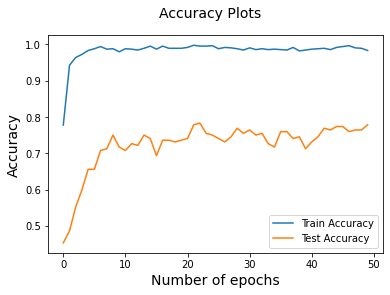

In [ ]:
plt.figure(figsize=(6,4))
plt.suptitle('Accuracy Plots', fontsize=14)
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

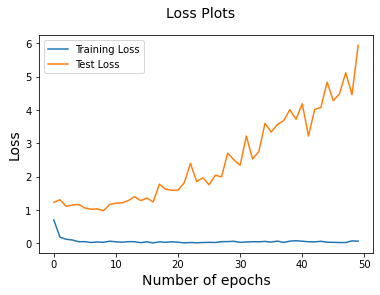

In [ ]:
#plot to visualize the loss and accuracy against number of epochs
plt.figure(figsize=(6,4))
plt.suptitle('Loss Plots', fontsize=14)
plt.subplot(1,1,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

plt.show()

